In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd

### 고객 행동 예측

#### 1: 데이터 읽고 확인

In [2]:
customer = pd.read_csv('./Data-in/customer_join.csv')
uselog = pd.read_csv('./Data-in/use_log.csv')
uselog_month = pd.read_csv('./Data-in/use_log_months.csv')

In [3]:
print(customer.isna().sum())
print(customer.isna().sum())

customer_id             0
name                    0
class                   0
gender                  0
start_date              0
end_date             2842
campaign_id             0
is_deleted              0
class_name              0
price                   0
campaign_name           0
mean                    0
median                  0
max                     0
min                     0
routine_flg             0
calc_date               0
membership_period       0
dtype: int64
customer_id             0
name                    0
class                   0
gender                  0
start_date              0
end_date             2842
campaign_id             0
is_deleted              0
class_name              0
price                   0
campaign_name           0
mean                    0
median                  0
max                     0
min                     0
routine_flg             0
calc_date               0
membership_period       0
dtype: int64


In [4]:
customer.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period
0,OA832399,XXXX,C01,F,2015-05-01,NaN,CA1,0,0_종일,10500,2_일반,4.833333,5.0,8,2,1,2019-04-30,47
1,PL270116,XXXXX,C01,M,2015-05-01,NaN,CA1,0,0_종일,10500,2_일반,5.083333,5.0,7,3,1,2019-04-30,47
2,OA974876,XXXXX,C01,M,2015-05-01,NaN,CA1,0,0_종일,10500,2_일반,4.583333,5.0,6,3,1,2019-04-30,47
3,HD024127,XXXXX,C01,F,2015-05-01,NaN,CA1,0,0_종일,10500,2_일반,4.833333,4.5,7,2,1,2019-04-30,47
4,HD661448,XXXXX,C03,F,2015-05-01,NaN,CA1,0,2_야간,6000,2_일반,3.916667,4.0,6,1,1,2019-04-30,47


In [5]:
uselog.head()

,log_id,customer_id,usedate
0,L00000049012330,AS009373,2018-04-01
1,L00000049012331,AS015315,2018-04-01
2,L00000049012332,AS040841,2018-04-01
3,L00000049012333,AS046594,2018-04-01
4,L00000049012334,AS073285,2018-04-01


In [6]:
uselog_month.head()

,연월,customer_id,count
0,201804,AS002855,4
1,201804,AS009013,2
2,201804,AS009373,3
3,201804,AS015315,6
4,201804,AS015739,7


#### 2: 클러스터링으로 회원 그룹화 

In [7]:
## 고객의 한달 이용 데이터
customer_clustering = customer[['mean', 'median', 'max', 'min','membership_period']]
customer_clustering.head()

,mean,median,max,min,membership_period
0,4.833333,5.0,8,2,47
1,5.083333,5.0,7,3,47
2,4.583333,5.0,6,3,47
3,4.833333,4.5,7,2,47
4,3.916667,4.0,6,1,47


In [8]:
## K-means 알고리즘 : 변수 간의 거리를 기반으로 그룹화 진행(비지도 학습)
# k : 4개의 그룹으로 지정 
# 컴퓨터는 정량적인 데이터를 중요하게 판단.                                # 녹음 7:24

from sklearn.cluster import KMeans           # 아나콘다 base에서 실행하므로 sklearn 설치안해도 import 된다.
from sklearn.preprocessing import StandardScaler   # 표준화(특성의 평균을 0, 표준편차 1로 조정) 

In [9]:
sc = StandardScaler()
customer_clustering_sc = sc.fit_transform(customer_clustering)
customer_clustering_sc

array([[-0.28120614, -0.13367635,  0.08117747, -0.5336197 ,  2.03402524],
       [-0.14054502, -0.13367635, -0.37992814, -0.02114919,  2.03402524],
       [-0.42186727, -0.13367635, -0.84103375, -0.02114919,  2.03402524],
       ...,
       [ 1.50050144,  1.46662237,  0.08117747,  2.54120338, -1.28811491],
       [ 3.18843493,  3.06692109,  1.46449428,  4.07861492, -1.28811491],
       [ 2.62579043,  2.53348819,  1.00338868,  3.56614441, -1.28811491]])

In [10]:
## Clustering 모델 구축 
kmeans = KMeans(n_clusters = 4, random_state = 21)    # KMeans라는 AI Algorithm  
    #  n_clusters : k-means의 k를 의미하는 군집형성의 개수        # random_state : 난수 고정. 학습결과 동일성
clusters = kmeans.fit(customer_clustering_sc)    # fit : 학습

In [11]:
customer_clustering['cluster'] = clusters.labels_
customer_clustering.head()

,mean,median,max,min,membership_period,cluster
0,4.833333,5.0,8,2,47,3
1,5.083333,5.0,7,3,47,3
2,4.583333,5.0,6,3,47,3
3,4.833333,4.5,7,2,47,3
4,3.916667,4.0,6,1,47,3


In [12]:
customer_clustering['cluster'].unique()

array([3, 1, 0, 2])

#### 3: 클러스터링 결과 분석

In [13]:
customer_clustering.columns = ['월평균값', '월중앙값', '월최댓값', '월최솟값', '회원기간', 'cluster']
customer_clustering.head()

,월평균값,월중앙값,월최댓값,월최솟값,회원기간,cluster
0,4.833333,5.0,8,2,47,3
1,5.083333,5.0,7,3,47,3
2,4.583333,5.0,6,3,47,3
3,4.833333,4.5,7,2,47,3
4,3.916667,4.0,6,1,47,3


In [14]:
# 결과 : 그룹0 > 그룹3 > 그룹1 > 그룹2        # 수업 내용처럼 내 것 보고 적기
customer_clustering.groupby('cluster').count()

,월평균값,월중앙값,월최댓값,월최솟값,회원기간
cluster,,,,,
0,1331,1331,1331,1331,1331
1,771,771,771,771,771
2,841,841,841,841,841
3,1249,1249,1249,1249,1249


In [15]:
# 결과 : 그룹1은 회원기간이 짧지만 이용률이 높은 고객
# 그룹0과 그룹3은 그룹1과 그룹2에 비해, 회원 기간이 길지만 이용률이 낮음
# 그룹별 특징을 알고 서로 다른 캠페인 적용
customer_clustering.groupby('cluster').mean()

,월평균값,월중앙값,월최댓값,월최솟값,회원기간
cluster,,,,,
0,5.538187,5.389557,8.754320,2.702479,14.868520
1,3.065504,2.900130,4.783398,1.649805,9.276265
2,8.061076,8.046373,10.015458,6.171225,7.027348
3,4.677561,4.670937,7.233787,2.153723,36.915933


#### 4: 클러스터링 결과 가시화

In [16]:
## 차원 축소 : 비지도 학습의 일종, 정보를 되도록 잃지 않으면서 새로운 축을 만드는 것
# 차원 축소의 방법으로 주성분 분석을 사용
from sklearn.decomposition import PCA 

x = customer_clustering_sc

# 주성분 분석을 통해 2차원으로 데이터를 축소
pca = PCA(n_components = 2)
pca.fit(x)
x_pca = pca.transform(x)

# 축소된 데이터를 DataFrame으로 저장
pca_df = pd.DataFrame(x_pca)
pca_df['cluster'] = customer_clustering['cluster']
pca_df.head()

,0,1,cluster
0,-0.819982,-1.959097,3
1,-0.707922,-1.799857,3
2,-1.061499,-1.659826,3
3,-1.160764,-1.810139,3
4,-2.017132,-1.670101,3


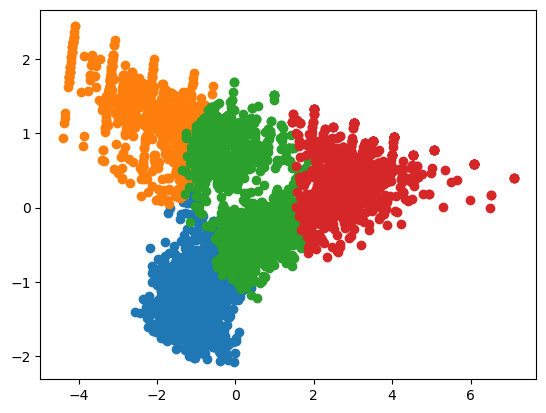

In [17]:
import matplotlib.pyplot as plt

for i in customer_clustering['cluster'].unique():
    # 'cluster' 열이 현재의 클러스터에 해당하는 행들만 선택하여 tmp에 저장
    tmp = pca_df.loc[pca_df['cluster'] == i]
    plt.scatter(tmp[0], tmp[1])

#### 5: 클러스터링 결과를 바탕으로 탈퇴회원 경향 파악

In [18]:
## 클러스터링 3개의 그룹에 지속 회원과 탈퇴 회원은 얼마나 있을까?
customer_clustering.head()

,월평균값,월중앙값,월최댓값,월최솟값,회원기간,cluster
0,4.833333,5.0,8,2,47,3
1,5.083333,5.0,7,3,47,3
2,4.583333,5.0,6,3,47,3
3,4.833333,4.5,7,2,47,3
4,3.916667,4.0,6,1,47,3


In [19]:
customer_clustering = pd.concat([customer_clustering, customer], axis = 1)
customer_clustering

,월평균값,월중앙값,월최댓값,월최솟값,회원기간,cluster,customer_id,name,class,gender,...,class_name,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership_period
0,4.833333,5.0,8,2,47,3,OA832399,XXXX,C01,F,...,0_종일,10500,2_일반,4.833333,5.0,8,2,1,2019-04-30,47
1,5.083333,5.0,7,3,47,3,PL270116,XXXXX,C01,M,...,0_종일,10500,2_일반,5.083333,5.0,7,3,1,2019-04-30,47
2,4.583333,5.0,6,3,47,3,OA974876,XXXXX,C01,M,...,0_종일,10500,2_일반,4.583333,5.0,6,3,1,2019-04-30,47
3,4.833333,4.5,7,2,47,3,HD024127,XXXXX,C01,F,...,0_종일,10500,2_일반,4.833333,4.5,7,2,1,2019-04-30,47
4,3.916667,4.0,6,1,47,3,HD661448,XXXXX,C03,F,...,2_야간,6000,2_일반,3.916667,4.0,6,1,1,2019-04-30,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4187,8.000000,8.0,8,8,1,2,HD676663,XXXX,C01,M,...,0_종일,10500,2_일반,8.000000,8.0,8,8,0,2019-04-30,1
4188,10.000000,10.0,10,10,1,2,HD246549,XXXXX,C01,F,...,0_종일,10500,2_일반,10.000000,10.0,10,10,0,2019-04-30,1
4189,8.000000,8.0,8,8,1,2,GD037007,XXXXX,C03,M,...,2_야간,6000,2_일반,8.000000,8.0,8,8,0,2019-04-30,1
4190,11.000000,11.0,11,11,1,2,OA953150,XXXXX,C01,M,...,0_종일,10500,2_일반,11.000000,11.0,11,11,0,2019-04-30,1


In [20]:
# 그룹별 탈퇴/지속 회원 집계
b = customer_clustering.groupby(['cluster', 'is_deleted'], as_index= False).count()[['cluster', 'is_deleted','customer_id']]
b

,cluster,is_deleted,customer_id
0,0,0,789
1,0,1,542
2,1,1,771
3,2,0,822
4,2,1,19
5,3,0,1231
6,3,1,18


In [21]:
a = customer_clustering[['cluster', 'is_deleted', 'customer_id']].groupby(['cluster', 'is_deleted'], as_index = True).count()
## as_index = True(기본값) or False.  True로 할 때에 groutby 기준이었던 cluster와 is_deleted가 인덱스가 된다.
a

customer_id
cluster is_deleted             
0       0                   789
        1                   542
1       1                   771
2       0                   822
        1                    19
3       0                  1231
        1                    18

In [22]:
print(a.columns)
print(a.index)

Index(['customer_id'], dtype='object')
MultiIndex([(0, 0),
            (0, 1),
            (1, 1),
            (2, 0),
            (2, 1),
            (3, 0),
            (3, 1)],
           names=['cluster', 'is_deleted'])


In [23]:
print(b.columns)
print(b.index)

Index(['cluster', 'is_deleted', 'customer_id'], dtype='object')
RangeIndex(start=0, stop=7, step=1)


In [ ]:
byCustomer = customer_clustering.pivot_table(index = 'is_deleted', columns='cluster', aggfunc='size', fill_value= 0)
byCustomer

cluster,0,1,2,3
is_deleted,,,,
0,789,0,822,1231
1,542,771,19,18


In [27]:
## 정기적/비정기적 이용 여부
customer_clustering[['cluster', 'routine_flg', 'customer_id']].groupby(['cluster', 'routine_flg'], as_index = False).count()

,cluster,routine_flg,customer_id
0,0,0,226
1,0,1,1105
2,1,0,499
3,1,1,272
4,2,0,52
5,2,1,789
6,3,0,2
7,3,1,1247


In [26]:
# 결론 : 지속 회원이 많은 그룹 0,1,3에 정기적으로 이용하는 회원이 많음
customer_clustering.groupby(['cluster', 'routine_flg'], as_index= False).count()[['cluster', 'routine_flg','customer_id']]

,cluster,routine_flg,customer_id
0,0,0,226
1,0,1,1105
2,1,0,499
3,1,1,272
4,2,0,52
5,2,1,789
6,3,0,2
7,3,1,1247


#### 6: 다음 달의 이용 횟수 예측을 위해 데이터 준비 
- 지도학습

In [ ]:
## 6개월의 이용 데이터를 사용해 다음달의 이용 횟수를 예측
# 2018년 5월 ~ 10월까지 6개월의 이용 데이터, 추가로 2018년 11월의 이용 횟수(정답데이터)
# 고객의 특정 월별 데이터 작성

In [36]:
## uselog데이터를 이용해 연월, 회원마다 집계
uselog['usedate'] = pd.to_datetime(uselog['usedate'])
uselog['연월'] = uselog['usedate'].dt.strftime('%Y%m')
uselog_months = uselog.groupby(['연월', 'customer_id'], as_index = False).count()
uselog_months.rename(columns={'log_id' : 'count'}, inplace=True)
del uselog_months['usedate']
uselog_months

,연월,customer_id,count
0,201804,AS002855,4
1,201804,AS009013,2
2,201804,AS009373,3
3,201804,AS015315,6
4,201804,AS015739,7
...,...,...,...
36837,201903,TS995853,8
36838,201903,TS998593,8
36839,201903,TS999079,3
36840,201903,TS999231,6


In [29]:
# 2018년 10월~ 2019년 3월 (반년)
year_months = list(uselog_months['연월'].unique())
year_months

['201804',
 '201805',
 '201806',
 '201807',
 '201808',
 '201809',
 '201810',
 '201811',
 '201812',
 '201901',
 '201902',
 '201903']

In [37]:
predict_data = pd.DataFrame()
for i in range(6, len(year_months)):
    # print(year_months[i])
    tmp = uselog_months.loc[uselog_months['연월'] == year_months[i]]
    tmp.rename(columns={'count' : 'count_pred'}, inplace = True)
    
    for j in range(1, 7):
        tmp_before = uselog_months.loc[uselog_months['연월'] == year_months[i-j]]
        # print(year_months[i - j])

        del tmp_before['연월']
        tmp_before.rename(columns = {'count' : 'count_{}'.format(j-1)}, inplace = True)            
                    # count_pred 예측값
        tmp = pd.merge(tmp, tmp_before, on = 'customer_id', how = 'left')
    predict_data = pd.concat([predict_data, tmp], ignore_index= True)

predict_data

,연월,customer_id,count_pred,count_0,count_1,count_2,count_3,count_4,count_5
0,201810,AS002855,3,7.0,3.0,5.0,5.0,5.0,4.0
1,201810,AS008805,2,2.0,5.0,7.0,8.0,NaN,NaN
2,201810,AS009373,5,6.0,6.0,7.0,4.0,4.0,3.0
3,201810,AS015233,7,9.0,11.0,5.0,7.0,7.0,NaN
4,201810,AS015315,4,7.0,3.0,6.0,3.0,3.0,6.0
...,...,...,...,...,...,...,...,...,...
18305,201903,TS995853,8,11.0,NaN,NaN,NaN,NaN,NaN
18306,201903,TS998593,8,7.0,8.0,7.0,9.0,9.0,9.0
18307,201903,TS999079,3,2.0,6.0,9.0,6.0,6.0,4.0
18308,201903,TS999231,6,6.0,3.0,8.0,5.0,5.0,4.0


In [38]:
# 6개월 이상 가입한 회원의 정보만 남기기
predict_data = predict_data.dropna()          # 결측치 하나라도 있는 행 지워버린다.
predict_data = predict_data.reset_index(drop = True)
predict_data.head()

,연월,customer_id,count_pred,count_0,count_1,count_2,count_3,count_4,count_5
0,201810,AS002855,3,7.0,3.0,5.0,5.0,5.0,4.0
1,201810,AS009373,5,6.0,6.0,7.0,4.0,4.0,3.0
2,201810,AS015315,4,7.0,3.0,6.0,3.0,3.0,6.0
3,201810,AS015739,5,6.0,5.0,8.0,6.0,5.0,7.0
4,201810,AS019860,7,5.0,7.0,4.0,6.0,8.0,6.0


#### 7: 특징이 되는 변수 추가

In [39]:
predict_data = pd.merge(predict_data, customer[['customer_id', 'start_date']], on = 'customer_id', how = 'left')
predict_data.head()

,연월,customer_id,count_pred,count_0,count_1,count_2,count_3,count_4,count_5,start_date
0,201810,AS002855,3,7.0,3.0,5.0,5.0,5.0,4.0,2016-11-01
1,201810,AS009373,5,6.0,6.0,7.0,4.0,4.0,3.0,2015-11-01
2,201810,AS015315,4,7.0,3.0,6.0,3.0,3.0,6.0,2015-07-01
3,201810,AS015739,5,6.0,5.0,8.0,6.0,5.0,7.0,2017-06-01
4,201810,AS019860,7,5.0,7.0,4.0,6.0,8.0,6.0,2017-10-01


In [50]:
predict_data['now_date'] = pd.to_datetime(predict_data['연월'], format= '%Y%m')

In [51]:
predict_data['start_date'] = pd.to_datetime(predict_data['start_date'])

In [54]:
predict_data['period'] = (predict_data['now_date'] - predict_data['start_date'])

In [55]:
predict_data.head()

,연월,customer_id,count_pred,count_0,count_1,count_2,count_3,count_4,count_5,start_date,now_date,period
0,201810,AS002855,3,7.0,3.0,5.0,5.0,5.0,4.0,2016-11-01,2018-10-01,699 days
1,201810,AS009373,5,6.0,6.0,7.0,4.0,4.0,3.0,2015-11-01,2018-10-01,1065 days
2,201810,AS015315,4,7.0,3.0,6.0,3.0,3.0,6.0,2015-07-01,2018-10-01,1188 days
3,201810,AS015739,5,6.0,5.0,8.0,6.0,5.0,7.0,2017-06-01,2018-10-01,487 days
4,201810,AS019860,7,5.0,7.0,4.0,6.0,8.0,6.0,2017-10-01,2018-10-01,365 days


In [60]:
## 수업
from dateutil.relativedelta import relativedelta

predict_data['now_date'] = pd.to_datetime(predict_data['연월'], format= '%Y%m')
predict_data['start_date'] = pd.to_datetime(predict_data['start_date'])

predict_data['period'] = None

for i in range(len(predict_data)):
    delta = relativedelta(predict_data['now_date'][i], predict_data['start_date'][i])     # 결과값 years 와 months로 도출된다.
    # print(delta)
    predict_data['period'][i] = delta.years * 12 + delta.months
    # print(delta.years, delta.months)

predict_data.head()

,연월,customer_id,count_pred,count_0,count_1,count_2,count_3,count_4,count_5,start_date,now_date,period
0,201810,AS002855,3,7.0,3.0,5.0,5.0,5.0,4.0,2016-11-01,2018-10-01,23
1,201810,AS009373,5,6.0,6.0,7.0,4.0,4.0,3.0,2015-11-01,2018-10-01,35
2,201810,AS015315,4,7.0,3.0,6.0,3.0,3.0,6.0,2015-07-01,2018-10-01,39
3,201810,AS015739,5,6.0,5.0,8.0,6.0,5.0,7.0,2017-06-01,2018-10-01,16
4,201810,AS019860,7,5.0,7.0,4.0,6.0,8.0,6.0,2017-10-01,2018-10-01,12


#### 8: 다음달 이용 횟수를 예측하는 모델 구축 

In [ ]:
from sklearn import linear_model
import sklearn.model_selection

# 2018-04-01 이후 새로 들어온 회원을 기준으로 데이터셋 사용 
predict_data = predict_data.loc[predict_data['start_date'] >= pd.to_datetime('20180401')]    

# 모델 알고리즘 선언
model = linear_model.LinearRegression()

# AI Algorithm에 들어갈 X, y를 추출
# y는 count_pred 나머지가 X
# 모델에서 각기 들어가는 customer_id 같은 거는 필드로 쓰지 않는다. start_date와 now_date는 period와 중보되니 제거.    데이터를 가공해서 model에 집어 넣는다.
# -> customer_id, start_date, now_date, 연월 쓰지 않는다.

X = predict_data[['count_0','count_1','count_2','count_3','count_4','count_5','period']]
y = predict_data['count_pred']

# train과 test set 구분  (75%, 25%) because 모델 유연성
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X,y)

# 학습. Model이 만들어짐
model.fit(X_train, y_train)


In [63]:
## model은 X_test에 의해 답을 예측하고, 예측된 답과 정답인 y_test를 비교하여 성능평가를 함.
print(model.score(X_test, y_test))

0.6092623037797085


#### 9: 모델에 기여하는 변수 확인

In [65]:
## AI 회귀 분석의 의미는 회귀계수 값을 잘 구하는 것
# Data를 잘 설명할 수 있는 회귀계수 값을 만드는 것이 분석의 목적
# model.coef_ : 회귀계수 (y값에 영향을 주는 변수의 가중치)
 
coef = pd.DataFrame({'feature_names':X.columns, 'coefficient':model.coef_})
coef

# 결과 : count_0의 회귀계수가 가장 큼. 과거로 갈수록 (y값에 영향을 미치는) 기여도가 점점 작아진다.
#       이전 달의 이용 횟수가 다음 달의 이용 횟수에 가장 큰 영향을 미친다. 

,feature_names,coefficient
0,count_0,0.345423
1,count_1,0.199798
2,count_2,0.158112
3,count_3,0.166994
4,count_4,0.077253
5,count_5,0.075465
6,period,0.082568


#### 10: 다음 달의 이용 횟수 예측 

In [67]:
# 첫번째 x1 회원은 6개월 전부터 1개월 마다 [3, 4, 5, 6, 8, 7] 이렇게 방문함.
# 두번째 x2 회원은 아래처럼 방문함
# 마지막 8 의미 : 재적 기간 (8개월 동안 있었다.)
x1 = [3, 4, 5, 6, 8, 7, 8]
x2 = [2, 2, 3, 3, 4, 6, 8]
x_pred = [x1, x2]

In [68]:
model.predict(x_pred)

# 결과 : x1 회원은 다음 달 3.94번 이용 예측, x2 회원은 다음 달 1.99번 이용 예측된다.

array([3.94056034, 1.99385665])

In [71]:
uselog_months.to_csv('./Data-out/ues_log_months.csv', index = False)